In [2]:
#In this project, we are going to try and make a machine learning algorithm that can predict if an individual has coronavirus.
#the dataset we are going to use is a csv file containing over 270000 individuals that have been tested for coronavirus.
#the number of individuals will probably be greatly reduced after preprocessing the data, because we can't fill our data in this
#case.
#the dataset includes a column with test results, which will be our target.
#it also has a variety of different symptoms which we'll use as our features.

In [3]:
#let's start by importing some basic libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#now let's import our file and have a look at it.
lab_corona = pd.read_csv("Corona_Tests.csv", low_memory=False)
lab_corona

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other
...,...,...,...,...,...,...,...,...,...,...
278843,2020-03-11,0,0,0,0,0,negative,None,None,Other
278844,2020-03-11,0,0,0,0,0,negative,None,None,Other
278845,2020-03-11,0,0,0,0,0,positive,None,None,Contact with confirmed
278846,2020-03-11,0,0,0,0,0,other,None,None,Other


In [5]:
#in this dataset, NaNs are written as "None", so we will have to clean it manually.
def clean(column):
    lab_corona.drop(lab_corona[lab_corona[column] == "None"].index, inplace = True)

In [6]:
clean('test_date')
clean('cough')
clean("fever")
clean("sore_throat")
clean('shortness_of_breath')
clean('head_ache')
clean("corona_result")
clean("age_60_and_above")
clean('gender')
clean("test_indication")

In [7]:
lab_corona

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
122808,2020-04-14,1,0,0,0,0,negative,Yes,male,Other
122809,2020-04-14,1,0,0,0,0,positive,No,female,Other
122810,2020-04-14,0,0,0,0,0,negative,No,female,Other
122811,2020-04-14,0,1,0,0,0,negative,No,female,Abroad
122812,2020-04-14,1,0,0,0,0,negative,Yes,female,Other
...,...,...,...,...,...,...,...,...,...,...
265116,2020-03-22,1,1,0,0,0,negative,Yes,female,Abroad
265117,2020-03-22,1,1,1,0,1,negative,No,female,Abroad
265118,2020-03-22,1,0,0,0,0,negative,No,female,Abroad
265119,2020-03-22,1,0,0,0,0,negative,No,male,Other


In [8]:
#as we can see, about half of our data entries had something wrong.
#however we still have a big number of entries which is good.

(array([0, 1, 2]),
 [Text(0, 0, 'negative'), Text(1, 0, 'positive'), Text(2, 0, 'other')])

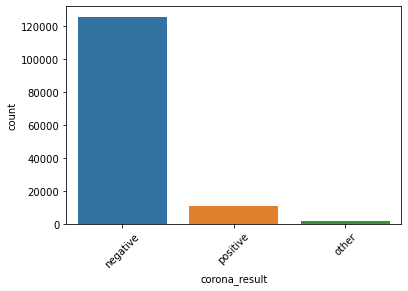

In [9]:
#let's now see the counts of the test results to get a general idea of the numbers we're working with.
sns.countplot(x="corona_result", data= lab_corona)
plt.xticks(rotation = 45)

In [10]:
#as we can see the negative results are WAY bigger than positive results.
#i've also noticed there's an "other" category in our test results.
#we don't know the interpretation of this category, so we will drop any row containing it.
lab_corona.drop(lab_corona[lab_corona["corona_result"] == "other"].index, inplace = True)

(array([0, 1]), [Text(0, 0, 'negative'), Text(1, 0, 'positive')])

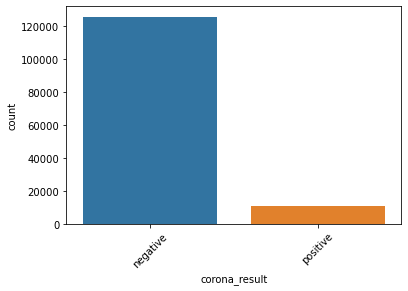

In [11]:
sns.countplot(x="corona_result", data= lab_corona)
plt.xticks(rotation = 45)

In [12]:
#let's rename some columns for ease of typing before we start working.
lab_corona.rename(columns={"shortness_of_breath" : "short_breath", "corona_result" : "infected", "age_60_and_above" : "age_60"}, inplace=True)

In [13]:
lab_corona

,test_date,cough,fever,sore_throat,short_breath,head_ache,infected,age_60,gender,test_indication
122808,2020-04-14,1,0,0,0,0,negative,Yes,male,Other
122809,2020-04-14,1,0,0,0,0,positive,No,female,Other
122810,2020-04-14,0,0,0,0,0,negative,No,female,Other
122811,2020-04-14,0,1,0,0,0,negative,No,female,Abroad
122812,2020-04-14,1,0,0,0,0,negative,Yes,female,Other
...,...,...,...,...,...,...,...,...,...,...
265116,2020-03-22,1,1,0,0,0,negative,Yes,female,Abroad
265117,2020-03-22,1,1,1,0,1,negative,No,female,Abroad
265118,2020-03-22,1,0,0,0,0,negative,No,female,Abroad
265119,2020-03-22,1,0,0,0,0,negative,No,male,Other


In [14]:
#let's now select our features.
#we will select them based on logic.
#let's drop age_60 since it doesn't have any real effect on a subject's chances of infection. but it does have an effect on 
#his survival
lab_corona.drop('age_60', axis='columns', inplace=True)

In [15]:
lab_corona.head()

,test_date,cough,fever,sore_throat,short_breath,head_ache,infected,gender,test_indication
122808,2020-04-14,1,0,0,0,0,negative,male,Other
122809,2020-04-14,1,0,0,0,0,positive,female,Other
122810,2020-04-14,0,0,0,0,0,negative,female,Other
122811,2020-04-14,0,1,0,0,0,negative,female,Abroad
122812,2020-04-14,1,0,0,0,0,negative,female,Other


In [16]:
#we'll do the same for test_indication
lab_corona.drop('test_indication', axis='columns', inplace=True)

In [17]:
lab_corona.head()

,test_date,cough,fever,sore_throat,short_breath,head_ache,infected,gender
122808,2020-04-14,1,0,0,0,0,negative,male
122809,2020-04-14,1,0,0,0,0,positive,female
122810,2020-04-14,0,0,0,0,0,negative,female
122811,2020-04-14,0,1,0,0,0,negative,female
122812,2020-04-14,1,0,0,0,0,negative,female


In [18]:
#let's now apply a label encoder on infected and gender to make them easier to work with.
label_dict = {"negative":0, "positive":1,"male":0,'female':1}
lab_corona.replace(label_dict, inplace=True)

In [19]:
lab_corona

,test_date,cough,fever,sore_throat,short_breath,head_ache,infected,gender
122808,2020-04-14,1,0,0,0,0,0,0
122809,2020-04-14,1,0,0,0,0,1,1
122810,2020-04-14,0,0,0,0,0,0,1
122811,2020-04-14,0,1,0,0,0,0,1
122812,2020-04-14,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
265116,2020-03-22,1,1,0,0,0,0,1
265117,2020-03-22,1,1,1,0,1,0,1
265118,2020-03-22,1,0,0,0,0,0,1
265119,2020-03-22,1,0,0,0,0,0,0


In [20]:
#our data is now ready to be used, and the preprocessing phase is now over.

In [21]:
#let's now visualize each of our features in relation to our target.
def viz(v):
    cor = sns.FacetGrid(lab_corona, col=v)
    cor.map(plt.hist, "infected", bins = 3)

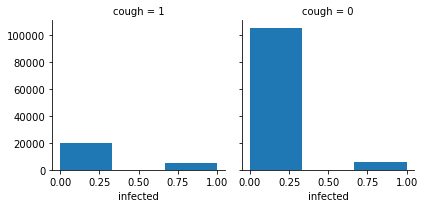

In [22]:
viz('cough')
#we can see that subjects that didn't experience a cough, have a much lower chance at being infected.
#but the opposite is not necessarily true.

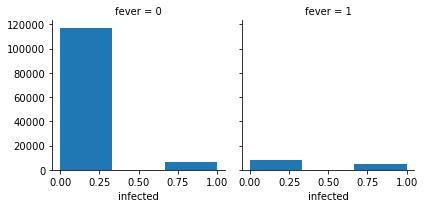

In [23]:
viz("fever")
#the exact same thing goes for fever.

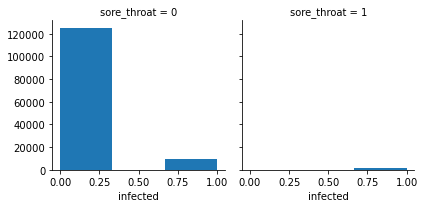

In [24]:
viz("sore_throat")
#once again the same thing for sore throat.
#and not that many people experienced a sore throat

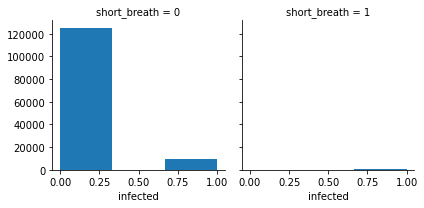

In [25]:
viz("short_breath")
#same as sore throat

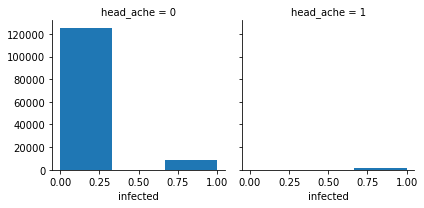

In [26]:
viz("head_ache")
#once again the same.

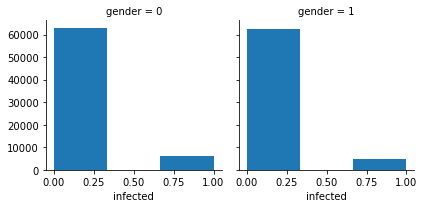

In [27]:
viz("gender")
#we can see that the two graphs are the same which means gender has almost no effect on our target
#we'll drop this feature

In [28]:
lab_corona.drop('gender', axis='columns', inplace=True)

In [29]:
lab_corona.head()

,test_date,cough,fever,sore_throat,short_breath,head_ache,infected
122808,2020-04-14,1,0,0,0,0,0
122809,2020-04-14,1,0,0,0,0,1
122810,2020-04-14,0,0,0,0,0,0
122811,2020-04-14,0,1,0,0,0,0
122812,2020-04-14,1,0,0,0,0,0


In [30]:
#let's now make a model.
#since our target is categorical, we'll use logistic regression.
#after that, we'll also apply k-fold cross validation since our dataset has a large number of not-infected subjects.

Accuracy=0.95
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     25150
           1       0.94      0.31      0.47      2109

    accuracy                           0.95     27259
   macro avg       0.94      0.66      0.72     27259
weighted avg       0.94      0.95      0.93     27259

scores:  [0.94478888 0.94379838 0.94515573 0.94654976 0.94419987]
average:  0.9448985230556362


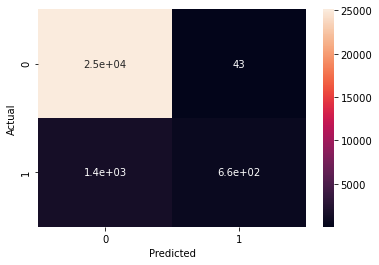

In [31]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

x = lab_corona[['cough', 'fever','sore_throat','short_breath','head_ache']]
y = lab_corona["infected"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(classification_report(y_test,y_pred))
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(logreg, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("scores: ", scores)
print("average: ", sum(scores)/5)

In [32]:
#as we can see, we got pretty good accuracy both times, which means our model did good.
#let's now try using unsupervised learning algorithms.

In [33]:
#let's start by removing the test date, and the target, which is infected.
unlab_corona1 = lab_corona.drop('infected', axis='columns', inplace=False)
unlab_corona = unlab_corona1.drop("test_date", axis=1, inplace=False)

In [34]:
unlab_corona.head()

,cough,fever,sore_throat,short_breath,head_ache
122808,1,0,0,0,0
122809,1,0,0,0,0
122810,0,0,0,0,0
122811,0,1,0,0,0
122812,1,0,0,0,0


In [35]:
#now let's reduce our dataset since we don't have enough memory to work with 130k data entries in the agglomerative clustering
#algorithm.
corona_reduced = unlab_corona.iloc[:10000,:]

In [36]:
#let's now make our model.
from sklearn.cluster import AgglomerativeClustering 
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(corona_reduced)

In [37]:
#let's take a look at our results.
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,1
3,1
4,0
...,...
9995,1
9996,1
9997,1
9998,1


In [38]:
#these extra steps are due to errors.
agglomerative.rename(columns={0:"mah"}, inplace=True)

In [39]:
agglomerative

,mah
0,0
1,0
2,1
3,1
4,0
...,...
9995,1
9996,1
9997,1
9998,1


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

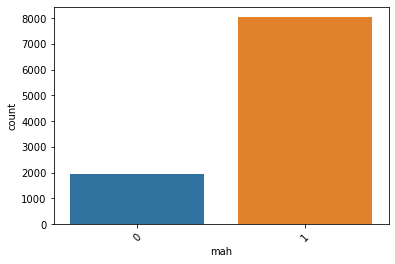

In [40]:
sns.countplot(x="mah", data= agglomerative)
plt.xticks(rotation = 45)

In [41]:
#let's now compare the results from the clustering algorithm to the actual values.

In [42]:
corona_test1 = lab_corona.drop("test_date", axis=1, inplace=False)

In [43]:
corona_test = corona_test1.iloc[:10000,:]

In [44]:
corona_test

,cough,fever,sore_throat,short_breath,head_ache,infected
122808,1,0,0,0,0,0
122809,1,0,0,0,0,1
122810,0,0,0,0,0,0
122811,0,1,0,0,0,0
122812,1,0,0,0,0,0
...,...,...,...,...,...,...
133134,0,0,0,0,0,0
133135,0,0,0,0,0,0
133136,0,0,0,0,0,0
133137,0,0,0,0,0,0


In [45]:
corona_test.reset_index(inplace=True)

In [46]:
corona_test

,index,cough,fever,sore_throat,short_breath,head_ache,infected
0,122808,1,0,0,0,0,0
1,122809,1,0,0,0,0,1
2,122810,0,0,0,0,0,0
3,122811,0,1,0,0,0,0
4,122812,1,0,0,0,0,0
...,...,...,...,...,...,...,...
9995,133134,0,0,0,0,0,0
9996,133135,0,0,0,0,0,0
9997,133136,0,0,0,0,0,0
9998,133137,0,0,0,0,0,0


In [48]:
corona_test.drop("index",axis=1,inplace=True)
corona_test

D:\Software\Mah Anaconda GOO\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,cough,fever,sore_throat,short_breath,head_ache,infected
0,1,0,0,0,0,0
1,1,0,0,0,0,1
2,0,0,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
9995,0,0,0,0,0,0
9996,0,0,0,0,0,0
9997,0,0,0,0,0,0
9998,0,0,0,0,0,0


In [49]:
df3 = corona_test.join(agglomerative)

In [50]:
df3

,cough,fever,sore_throat,short_breath,head_ache,infected,mah
0,1,0,0,0,0,0,0
1,1,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,1,0,0,0,0,1
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,1
9996,0,0,0,0,0,0,1
9997,0,0,0,0,0,0,1
9998,0,0,0,0,0,0,1


In [51]:
df3["result"] = 1


In [52]:
df3 

,cough,fever,sore_throat,short_breath,head_ache,infected,mah,result
0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,1
2,0,0,0,0,0,0,1,1
3,0,1,0,0,0,0,1,1
4,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,1,1
9996,0,0,0,0,0,0,1,1
9997,0,0,0,0,0,0,1,1
9998,0,0,0,0,0,0,1,1


In [53]:
df3["result"] = df3["infected"] == df3["mah"]

In [54]:
df3

,cough,fever,sore_throat,short_breath,head_ache,infected,mah,result
0,1,0,0,0,0,0,0,True
1,1,0,0,0,0,1,0,False
2,0,0,0,0,0,0,1,False
3,0,1,0,0,0,0,1,False
4,1,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,1,False
9996,0,0,0,0,0,0,1,False
9997,0,0,0,0,0,0,1,False
9998,0,0,0,0,0,0,1,False


(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

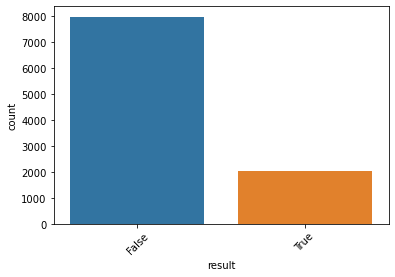

In [55]:
sns.countplot(x="result", data= df3)
plt.xticks(rotation = 45)

In [56]:
#we can see that our agglomerative clustering model did not do good.
#let's now try k-means.
from sklearn.cluster import KMeans  
kmeans=KMeans(n_clusters=2, random_state=0)
kmeans.fit(unlab_corona)

KMeans(n_clusters=2, random_state=0)

In [57]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,0
2,1
3,1
4,0
...,...
136289,0
136290,0
136291,0
136292,0


In [64]:
labels.rename(columns={0:"kmeans_result"}, inplace=True)

In [76]:
labels

,kmeans_result
0,0
1,0
2,1
3,1
4,0
...,...
136289,0
136290,0
136291,0
136292,0


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

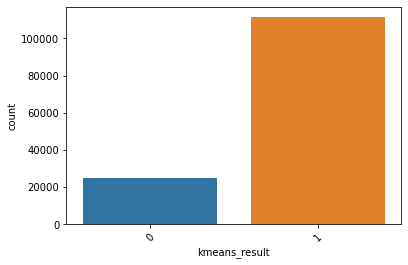

In [77]:
sns.countplot(x="kmeans_result", data= labels)
plt.xticks(rotation = 45)

In [81]:
df4 = lab_corona
df4.reset_index(inplace=True)
df4

,index,test_date,cough,fever,sore_throat,short_breath,head_ache,infected
0,122808,2020-04-14,1,0,0,0,0,0
1,122809,2020-04-14,1,0,0,0,0,1
2,122810,2020-04-14,0,0,0,0,0,0
3,122811,2020-04-14,0,1,0,0,0,0
4,122812,2020-04-14,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
136289,265116,2020-03-22,1,1,0,0,0,0
136290,265117,2020-03-22,1,1,1,0,1,0
136291,265118,2020-03-22,1,0,0,0,0,0
136292,265119,2020-03-22,1,0,0,0,0,0


In [ ]:
df4.drop("index",axis=1,inplace=True)

In [85]:
df4["kmeans_comparison"] = df4["infected"] == labels["kmeans_result"]

In [90]:
df4

,test_date,cough,fever,sore_throat,short_breath,head_ache,infected,result,kmeans_comparison
0,2020-04-14,1,0,0,0,0,0,True,True
1,2020-04-14,1,0,0,0,0,1,False,False
2,2020-04-14,0,0,0,0,0,0,False,False
3,2020-04-14,0,1,0,0,0,0,False,False
4,2020-04-14,1,0,0,0,0,0,True,True
...,...,...,...,...,...,...,...,...,...
136289,2020-03-22,1,1,0,0,0,0,True,True
136290,2020-03-22,1,1,1,0,1,0,True,True
136291,2020-03-22,1,0,0,0,0,0,True,True
136292,2020-03-22,1,0,0,0,0,0,True,True


(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

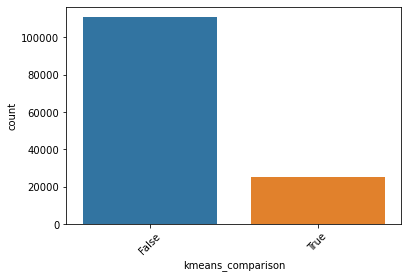

In [91]:
sns.countplot(x="kmeans_comparison", data= df4)
plt.xticks(rotation = 45)

In [92]:
#as we can see, kmeans also didn't do good.
#this might be because of one of two reasons:
#first of all, all of our values are categorical, so the mean isn't very that useful.
#secondly, we have too much variables, which means we can't dig deeper to find the problem using visualization.
#so for this project, the best model is logistic regression.
#as seen, logistic regression got amazing scores for such a problem.
#real used algorithms for diseases out there might not get this good an accuracy, so i'm pretty happy with the results.